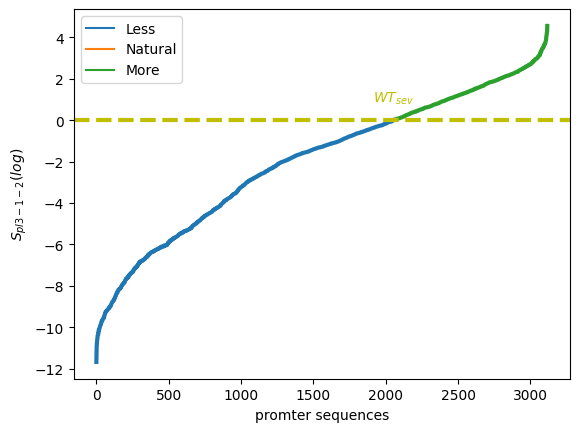

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import Levenshtein
import pandas as pd
import numpy as np
# SEV
original_sev = 'atcccgggtgaggcatcccaccatcctcagtcacagagagacccaatctaccatcagcatcagccagtaaagattaagaaaaacttagggtgaaagaaatttcacctaacacggcgca'.upper()
original_sfv = 'atggcggatgtgtgacatacacgacgccaaaagattttgttccagctcctgccacctccgctacgcgagagattaaccacccacg'.upper()
original_vee = 'atgggcggcgcatgagagaagcccagaccaattacctacccaaa'.upper()
original_infl = 'AGCAAAAGCAGGGTGACAAAAACATA'
name,original_seq="pl3-1-2",original_sev
data_dir="/Users/john/data/Promter/results"
df = pd.read_csv(f"{data_dir}/{name}/{name}_final.csv")
df['distance'] = df.seq.apply(lambda x: Levenshtein.distance(original_seq, x))
df=df[(df["plasmid_counts"]>15)]
orv = df[df.seq==original_seq].iloc[0]
plasmid_counts,rna_counts=orv.plasmid_counts,orv.rna_counts
df["abs_score"] = df["rna_counts"]/df["plasmid_counts"]*plasmid_counts/rna_counts
df["score"] = np.log(df["abs_score"])

# name,original_seq="INFL_0522",original_infl # 0.94,0.94,0.95
# name,original_seq="VEE_0816",original_vee # 0.83,0.83,0.82
# name,original_seq="SFV_0719",original_sfv #0.77, 0.79,0.78
# data_dir=f"/Users/john/data/5UTR/{name}_"
# name = name.split("_")[0]
# df = pd.read_csv(f"{data_dir}final.csv")
# df["score"] = df['score_final']

# print(df[df.seq==original_seq])

orv = df[df.seq==original_seq].iloc[0]
bscore = orv.score
df["stype"] = df["score"].apply(lambda x: "More" if x>bscore else "Less" if x<bscore else "Natural")
df = df.sort_values(by="score")
df["cumsum"] = range(1,1+len(df))
orv = df[df.seq==original_seq].iloc[0]
y_coord, x_coord = orv.score,orv["cumsum"]
fig,ax=plt.subplots()
plot=sns.lineplot(data=df,x="cumsum", y="score", hue="stype",linewidth=3)
plot.axhline(y=y_coord, color='y', linestyle='--',linewidth=3)
y_coord=ax.get_ylim()[0] + (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.75
ax.text(x_coord, y_coord, "$WT_{sev}$",color='y', ha='center')
# plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plot.set_xlabel("promter sequences")
plot.set_ylabel("$S_{%s}(log)$" % (name))
plot.legend()
plt.show()


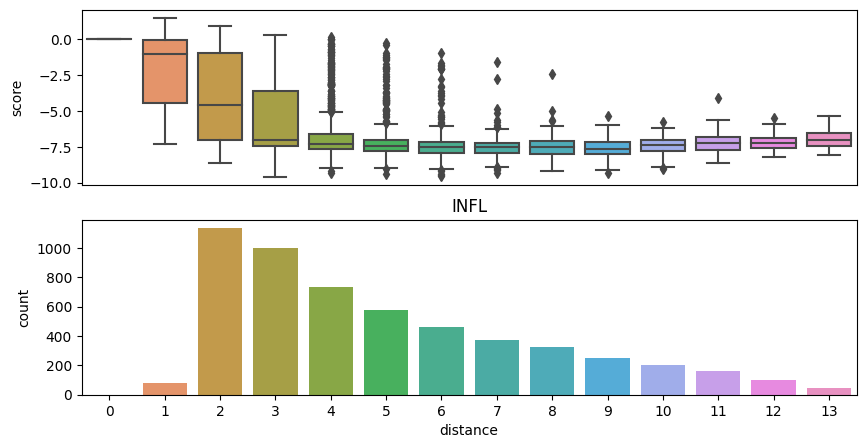

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
# name,original_seq="INFL_0522","" # 0.94,0.94,0.95
# name,original_seq="VEE_0816",original_sfv # 0.83,0.83,0.82
# name,original_seq="SFV_0719",original_vee #0.77, 0.79,0.78
# data_dir=f"/Users/john/data/5UTR/{name}_"
# df = pd.read_csv(f"{data_dir}final.csv")
# df["score"] = df['score_final']
pdf=df
fig,axs=plt.subplots(2, 1,figsize=(10,5))
cdf=pdf.groupby(["distance"])["seq"].count().reset_index(name='count')
plot=sns.boxplot(y='score',x='distance',data=pdf,ax=axs[0])
plot.set_xlabel("")
plot.set_xticks([])
sns.barplot(y='count',x='distance',data=cdf,ax=axs[1])
# mx=pdf.groupby('samples')['score'].median()
plt.title(f"{name}")
plt.show()

(5166, 14) (272, 14)


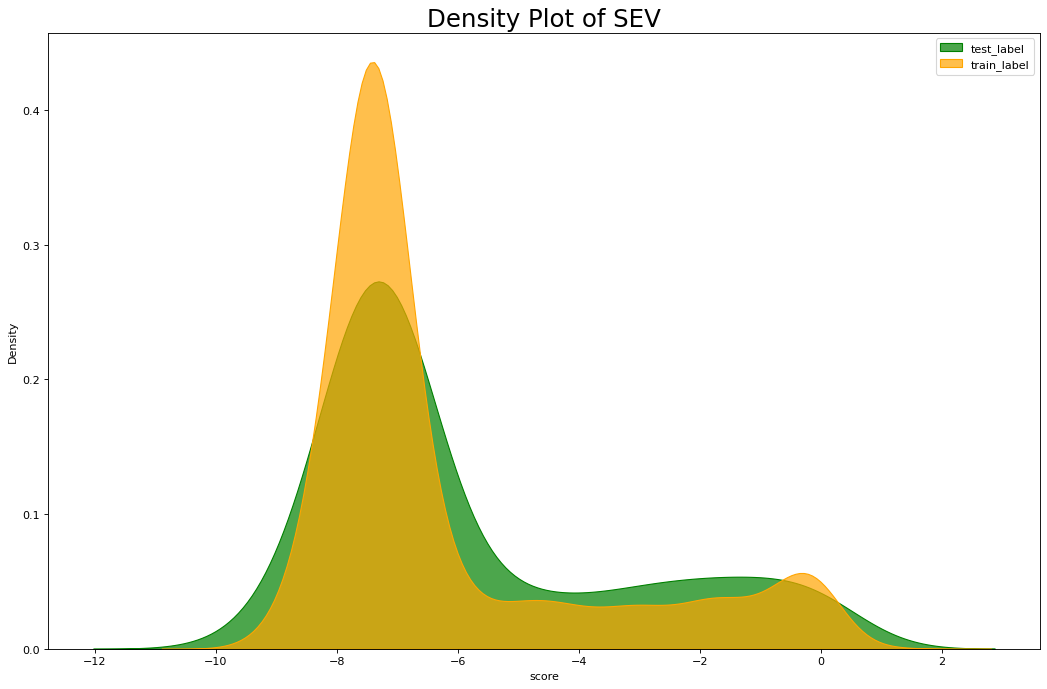

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
distance_bins = np.arange(0, df.distance.max() // 5 * 4, df.distance.max() // 5)
distance_bins = np.append(distance_bins, np.inf)
df['distance_cat'] = pd.cut(df.distance, bins=distance_bins, labels=list(range(1, len(distance_bins))), right=False)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.05, random_state=42)
for train_idx, test_idx in split.split(df, df["distance_cat"]):
    e_train = df.iloc[train_idx].reset_index(drop=True)
    e_test = df.iloc[test_idx].reset_index(drop=True)
print(e_train.shape, e_test.shape)
label = "score" # abs_score,length, score
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(e_test[label], fill=True, color="g", label="test_label", alpha=.7)
sns.kdeplot(e_train[label], fill=True, color="orange", label="train_label", alpha=.7) 
# Decoration
plt.title('Density Plot of SEV', fontsize=22)
plt.legend()
plt.show()

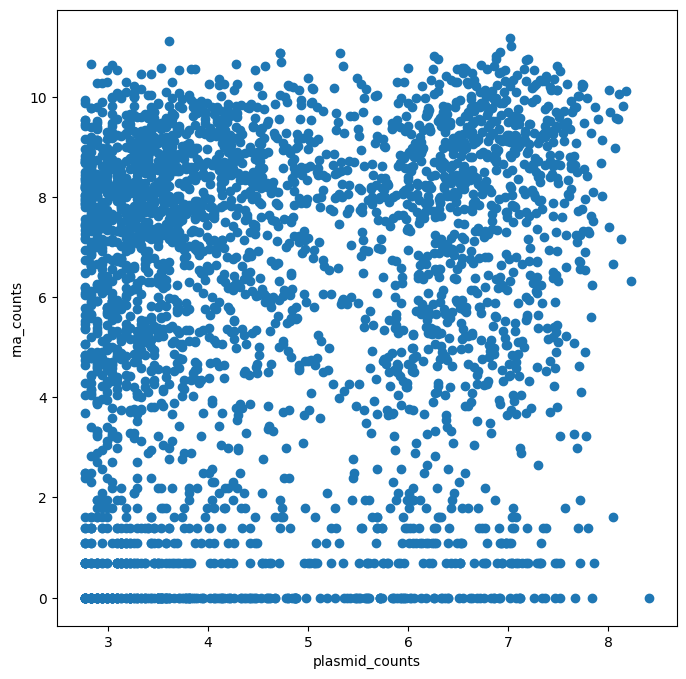

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# df=pd.read_csv("test.csv")
df=df[df.seq!=original_seq]
sdf = df
plt.figure(figsize=(8, 8))
plt.scatter(np.log(sdf["plasmid_counts"]), np.log(sdf["rna_counts"]), marker='o')
plt.xlabel("plasmid_counts")
plt.ylabel("rna_counts")
plt.show()